<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/DataCon-time-1/blob/main/notebooks/models1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#satisfying requirements
from pip._internal import main 
packages = ('traitlets', 
            'IPython', 
            'ipywidgets',
            'catboost', 
            'category-encoders',
            'pandas', 
            'numpy', 
            'seaborn', 
            'sklearn',
            'matplotlib',
            'pymatgen',
            'pprint')
for package in packages:
    try:
        __import__(package)
    except ImportError:
        main(['install', package.split()[0]])

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/final.csv?raw=true'
df = pd.read_csv(url, delimiter = ',', index_col=0)

X = df.drop('Viability (%)', axis=1, inplace=False)
y = df['Viability (%)']

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached category_encoders-2.5.0-py2.py3-none-any.whl (69 kB)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [121]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
model = regr.fit(X_train, y_train)
pred = model.predict(X_test)

In [122]:
scor = model.score(X_test, y_test)
print(f'Score for Random Fores Regressor: {scor}')
# print(regr.predict(X_test))

Score for Random Fores Regressor: 0.553090622248777


Text(0.5, 1.0, 'Random Fores Regressor')

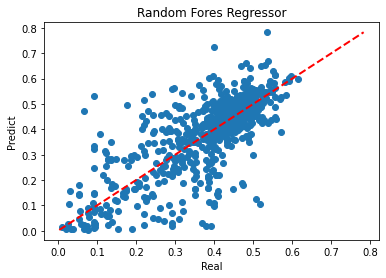

In [124]:
plt.scatter(pred, y_test)

plt.plot(
        [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2
    )
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('Random Fores Regressor')

In [ ]:
regr = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, criterion='mae', max_features='auto')
model = regr.fit(X_train, y_train)
pred = model.predict(X_test)
scor = model.score(X_test, y_test)
print(f'Score for Random Fores Regressor: {scor}')

plt.scatter(pred, y_test)

plt.plot(
        [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2
    )
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('Random Fores Regressor')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, random_state=10)
reg = GradientBoostingRegressor(random_state=10, learning_rate=0.9,
                                criterion='squared_error',)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

reg.score(X_test, y_test)

0.571923139151673

Text(0.5, 1.0, 'GradientBoostingRegressor')

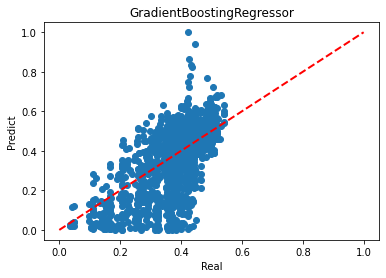

In [79]:
plt.scatter(pred, y_test)

plt.plot(
        [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2
    )
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('GradientBoostingRegressor')

Text(-0.2, 0.85, 'score = 0.5719')

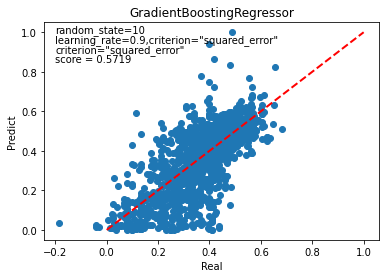

In [97]:
plt.scatter(pred, y_test)

plt.plot(
        [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2
    )
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('GradientBoostingRegressor')
plt.text(-0.2, 1, s='random_state=10')
plt.text(-0.2, 0.95, s='learning_rate=0.9,criterion="squared_error"')
plt.text(-0.2, 0.9, s='criterion="squared_error"')
plt.text(-0.2, 0.85, s='score = 0.5719')

In [116]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=10, n_estimators=100, learning_rate=0.1, )
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

regr.score(X_test, y_test)

0.11612125055909928

Text(0, 0.75, 'score=0.26399')

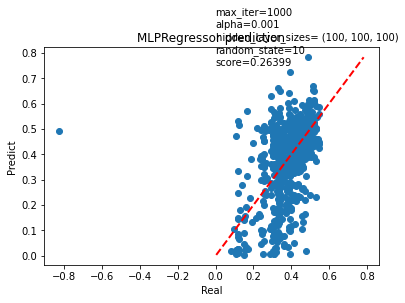

In [125]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=10, max_iter=1000, alpha=0.001, hidden_layer_sizes= (100, 100, 100)).fit(X_train, y_train)
pred = regr.predict(X_test)



plt.scatter(pred, y_test)

plt.plot(
        [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2
    )
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('MLPRegressor prediction')
plt.text(0, 0.80, s='random_state=10')
plt.text(0, 0.95, s='max_iter=1000')
plt.text(0, 0.9, s='alpha=0.001')
plt.text(0, 0.85, s='hidden_layer_sizes= (100, 100, 100)')
plt.text(0, 0.75, s='score=0.26399')